In [13]:
import seaborn as sns; sns.set()

# 1) Charget IRIS & 2) Isoler 

In [17]:
iris = sns.load_dataset('iris')

Y = iris['species'].astype('category').cat.codes
X = iris.drop('species', axis='columns')

# 3) Split Train Test

In [75]:
from sklearn.model_selection import train_test_split

splits = train_test_split(
    X,
    Y,
    random_state=8,
    stratify=Y
)

X_train, X_test, Y_train, Y_test = splits

# 4) PCA() -> Afficher la courbe

In [76]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X_train)

PCA()

Text(0, 0.5, &#39;Cumulative Explained Variance Ratio&#39;)

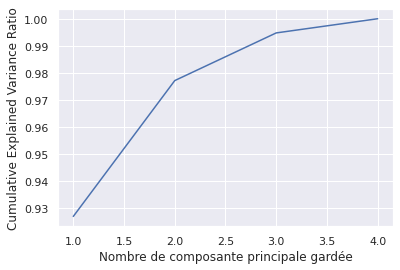

In [77]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([1,2,3,4], cumsum)
plt.xlabel("Nombre de composante principale gardée")
plt.ylabel("Cumulative Explained Variance Ratio")

# 5) PCA(n_comp=x).fit -> transform()

In [78]:
pca = PCA(n_components=2)

pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

# 6) KNN.fit(X_train_PCA)

In [83]:
from sklearn.neighbors import KNeighborsClassifier as KNN
#Créer un modèle de knn
knn = KNN(n_neighbors=10)
#Entrainer le modèle
knn.fit(X_train_PCA, Y_train)

KNeighborsClassifier(n_neighbors=10)

# 7) Accuracy

In [84]:
#Méthode de calcul de l'accuracy de la prédiction
def accuracy(preds, target):
    return (preds == target).sum() / len(target)

In [86]:
predictions = knn.predict(X_train_PCA)
print(accuracy(predictions, Y_test))

ValueError: (&#39;Lengths must match to compare&#39;, (38,), (112,))